# Assignment 2
Sceleton for assignment is based on the tutorial from the first course week.
## Part 1 - Use and explore
### 1.1 Explore data

Import **modules** that will be used.

In [90]:
from numpy import *
from sklearn import tree, datasets, metrics#, svm
import matplotlib.pyplot as plt

Loads a dataset with about **1800**, **8x8 pixel** image of **handwritten numbers**.

In [91]:
digits = datasets.load_digits()

Inspecting the data.

In [92]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [93]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [94]:
digits.data.shape

(1797, 64)

Using **Matplotlib** to **visualize** 10 training examples.

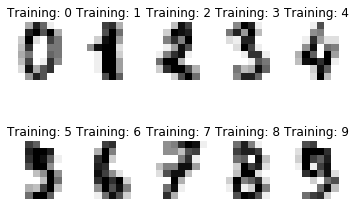

In [95]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### 1.2 Dividing the examples in the data set into a training and test set. Using a 70/30% split.

In [96]:
num_examples = len(digits.data)
num_examples

1797

In [97]:
num_split = int(0.7*num_examples)
num_split

1257

In [98]:
train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [99]:
print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


### 1.3 Set up a DecisionTreeClassifier as it comes in SciKitLearn
Based on instructions from https://scikit-learn.org/stable/modules/tree.html.

Create classifier and fit training data.

In [100]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_features,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Plots the tree using graphitz.

In [101]:
import graphviz
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("digits") 
dot_data = tree.export_graphviz(clf, out_file=None) 
                      #feature_names=digits.feature_names,  
                      #class_names=digits.target_names,  
                      #filled=True, rounded=True,  
                      #special_characters=True)  
graph = graphviz.Source(dot_data)  

From graph we see that all terminal nodes contains only a unique class. Further, we see that the tree is binary.

### 1.4 Test model
Predicts the trest data.

In [14]:
predicted = clf.predict(test_features)

Prints the confusion matrix.

In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(test_labels, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predicted))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        53
           1       0.80      0.70      0.75        53
           2       0.88      0.72      0.79        53
           3       0.77      0.70      0.73        53
           4       0.72      0.82      0.77        57
           5       0.86      0.86      0.86        56
           6       0.84      0.89      0.86        54
           7       0.89      0.91      0.90        54
           8       0.73      0.62      0.67        52
           9    

### 1.5 Altering parameters

In [16]:
x=[]
for k in range(100):
    clf= tree.DecisionTreeClassifier(min_samples_split=2)
    clf.fit(train_features,train_labels)
    predicted = clf.predict(test_features)
    x.append(metrics.f1_score(test_labels, predicted,average='weighted'))
mean(x)

0.7851098376489977

In [17]:
x=[]
for k in range(100):
    clf= tree.DecisionTreeClassifier(min_samples_split=3)
    clf.fit(train_features,train_labels)
    predicted = clf.predict(test_features)
    x.append(metrics.f1_score(test_labels, predicted,average='weighted'))
mean(x)

0.781978056805131

## Part 2 - Implementation ID3



In [18]:
# ID3 (Samples, Target_Attribute, Attributes)
#   Create a (root) node Root for the tree
# 
#   If all samples belong to one class <class_name>
#       Return the single-node tree Root, with label = <class_name>. 
# 
#   If Attributes is empty, then 
#       Return the single node tree Root, with label = most common class value in Samples.
#   else 
#       Begin
#           Let A be the attribute a in Attributes that generates the maximum information gain 
#                 when the tree is split based on a.
# 
#           Set A as the target_attribute of Root
# 
#           For each possible value, v, of A, add a new tree branch below Root, 
#                corresponding to the test A == v, i.e.,
#               Let Samples(v) be the subset of samples that have the value v for A.
#               If Samples(v) is empty, then 
#                   Below this new branch add a leaf node with label 
#                         = most common class value in Samples. 
#               else
#                   Below this new branch add the subtree ID3 (Samples(v), A, Attributes/{A}) 
#         End 
#   Return Root

In [19]:
import ID3
import ToyData as td
import numpy as np
from sklearn import tree, metrics, datasets

In [20]:
attributes, classes, data, target, data2, target2 = td.ToyData().get_data()
id3 = ID3.ID3DecisionTreeClassifier()
myTree = id3.fit(data, target, attributes, classes)
print(myTree)
plot = id3.make_dot_data()
plot.render("testTree")


{'id': 0, 'label': None, 'attribute': 'size', 'entropy': 0.9886994082884974, 'samples': 16, 'classCounts': {'+': 9, '-': 7}, 'nodes': [{'id': 1, 'label': None, 'attribute': 'shape', 'entropy': 0.8112781244591328, 'samples': 8, 'classCounts': {'+': 6, '-': 2}, 'nodes': [{'id': 2, 'label': None, 'attribute': 'color', 'entropy': 0.9182958340544896, 'samples': 6, 'classCounts': {'+': 4, '-': 2}, 'nodes': [{'id': 3, 'label': '+', 'attribute': None, 'entropy': 0.7219280948873623, 'samples': 5, 'classCounts': {'+': 4, '-': 1}, 'nodes': None}, {'id': 4, 'label': '-', 'attribute': None, 'entropy': 0, 'samples': 1, 'classCounts': {'-': 1}, 'nodes': None}, {'id': 5, 'label': '+', 'attribute': None, 'entropy': None, 'samples': 0, 'classCounts': '', 'nodes': None}]}, {'id': 6, 'label': '+', 'attribute': None, 'entropy': -0.0, 'samples': 2, 'classCounts': {'+': 2}, 'nodes': None}]}, {'id': 7, 'label': None, 'attribute': 'color', 'entropy': 0.954434002924965, 'samples': 8, 'classCounts': {'+': 3, '-'

'testTree.pdf'

2.5 Predict test data

In [21]:
attributes, classes, data, target, data2, target2 = td.ToyData().get_data()

id3 = ID3.ID3DecisionTreeClassifier()

myTree = id3.fit(data, target, attributes, classes)
print(myTree)
plot = id3.make_dot_data()
plot.render("testTree")
predicted = id3.predict(data2, myTree)
print(predicted)
print(target2)

{'id': 0, 'label': None, 'attribute': 'size', 'entropy': 0.9886994082884974, 'samples': 16, 'classCounts': {'+': 9, '-': 7}, 'nodes': [{'id': 1, 'label': None, 'attribute': 'shape', 'entropy': 0.8112781244591328, 'samples': 8, 'classCounts': {'+': 6, '-': 2}, 'nodes': [{'id': 2, 'label': None, 'attribute': 'color', 'entropy': 0.9182958340544896, 'samples': 6, 'classCounts': {'+': 4, '-': 2}, 'nodes': [{'id': 3, 'label': '+', 'attribute': None, 'entropy': 0.7219280948873623, 'samples': 5, 'classCounts': {'+': 4, '-': 1}, 'nodes': None}, {'id': 4, 'label': '-', 'attribute': None, 'entropy': 0, 'samples': 1, 'classCounts': {'-': 1}, 'nodes': None}, {'id': 5, 'label': '+', 'attribute': None, 'entropy': None, 'samples': 0, 'classCounts': '', 'nodes': None}]}, {'id': 6, 'label': '+', 'attribute': None, 'entropy': -0.0, 'samples': 2, 'classCounts': {'+': 2}, 'nodes': None}]}, {'id': 7, 'label': None, 'attribute': 'color', 'entropy': 0.954434002924965, 'samples': 8, 'classCounts': {'+': 3, '-'

In [22]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(target2, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target2, predicted))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           +       0.67      0.67      0.67         3
           -       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5


Confusion matrix:
[[2 1]
 [1 1]]


## Digits

In [64]:
classes=list(range(10))
attributes = {str(i):list(range(17)) for i in range(64)}

In [65]:
id3_dig = ID3.ID3DecisionTreeClassifier()
myTree_dig=id3_dig.fit(train_features,list(train_labels), attributes, classes);

In [66]:
predicted = id3_dig.predict(test_features,myTree_dig)


Predicting...


In [67]:
print("Classification report for classifier %s:\n%s\n"
      % (id3_dig, metrics.classification_report(test_labels, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predicted))

Classification report for classifier <ID3.ID3DecisionTreeClassifier object at 0x1a219f5e10>:
              precision    recall  f1-score   support

           0       0.22      0.28      0.25        53
           1       0.18      0.17      0.17        53
           2       0.32      0.40      0.35        53
           3       0.18      0.21      0.19        53
           4       0.35      0.33      0.34        57
           5       0.35      0.32      0.34        56
           6       0.33      0.26      0.29        54
           7       0.20      0.20      0.20        54
           8       0.16      0.15      0.16        52
           9       0.26      0.18      0.21        55

    accuracy                           0.25       540
   macro avg       0.25      0.25      0.25       540
weighted avg       0.25      0.25      0.25       540


Confusion matrix:
[[15  6  3  1  4  2  3  5 10  4]
 [13  9  7  0 10  1  5  2  2  4]
 [ 6  0 21  8  0  6  0  6  3  3]
 [ 3  1 13 11  0  9  1  8  3  

#### Compressed

In [167]:
classes=list(range(10))
attributes = {str(i):list(range(3)) for i in range(64)}

In [191]:
def comp(vec):   
    vec_new=[]
    if len(vec)==1: vec=[vec]
    for x in vec:
        if x<=5: vec_new.append(0)
        if x<=10: vec_new.append(1)
        else: vec_new.append(2)
    return vec_new

In [192]:
train_features_comp = [comp(i) for i in train_features]
train_labels_comp = list(train_labels)
test_features_comp = [comp(i) for i in test_features]
test_labels_comp=test_labels

In [193]:
id3_dig_comp = ID3.ID3DecisionTreeClassifier()
myTree_dig_comp=id3_dig_comp.fit(train_features_comp,train_labels_comp, attributes, classes);

In [194]:
predicted = id3_dig_comp.predict(test_features_comp,myTree_dig_comp)


Predicting...


In [195]:
print("Classification report for classifier %s:\n%s\n"
      % (id3_dig_comp, metrics.classification_report(test_labels_comp, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, predicted))

Classification report for classifier <ID3.ID3DecisionTreeClassifier object at 0x1a239428d0>:
              precision    recall  f1-score   support

           0       0.40      0.43      0.41        53
           1       0.57      0.66      0.61        53
           2       0.44      0.47      0.45        53
           3       0.30      0.38      0.34        53
           4       0.76      0.60      0.67        57
           5       0.62      0.43      0.51        56
           6       0.59      0.80      0.68        54
           7       0.49      0.39      0.43        54
           8       0.14      0.13      0.14        52
           9       0.32      0.27      0.29        55

    accuracy                           0.46       540
   macro avg       0.46      0.46      0.45       540
weighted avg       0.47      0.46      0.46       540


Confusion matrix:
[[23  2  3  2  2  0  3  1  8  9]
 [ 0 35  2  1  0  0  1  2  5  7]
 [ 6  4 25  9  0  0  0  1  4  4]
 [ 5  1  6 20  0  6  0  7  6  